In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import polars as pl
import sys

# sys.path.append('/data100t1/home/biand/Projects/PheWES/src')
# from pheML_develop import *

In [3]:
celiac_case = pd.read_csv('/data100t1/home/biand/Projects/PheWES/data/celiac_case_GRID_BioVU.txt', names=['grid'])
celiac_case.head()

,grid
0,R200961637
1,R200961637
2,R202239786
3,R202830629
4,R219371703


In [7]:
celiac_case.drop_duplicates(subset=['grid']).to_csv('../data/celiac_case_GRIDs.txt', index=False, header=False)

In [ ]:
celiac_case.grid.unique()

303

In [3]:
phecode_map = pd.read_csv(config['phecode_map_file'], dtype={'Phecode':str})
phecode_map = phecode_map[['Phecode', 'PhecodeString']].drop_duplicates(ignore_index=True)
phecode_map.Phecode = phecode_map.Phecode.apply(lambda x: x.strip())
phecode_map.index = phecode_map.Phecode
phecode_map.drop(columns=['Phecode'], inplace=True)
phecode_map = phecode_map.to_dict()
phecode_map = phecode_map['PhecodeString']

In [4]:
data = pd.read_csv('/data100t1/home/biand/Projects/PheWES/results/celiac_0902/0902_data_for_ML.csv')
data.head()

,grid,535.6,695.21,537,535.2,535,535.8,279.7,695.2,250.1,...,244.4,569,261.2,530.1,262,259,250.3,472,563,label
0,R200130574,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,R200961637,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,R200995944,0,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0,1,1
3,R201005482,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,R202239786,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
data[data['557']==1].label.value_counts()

label
1    301
0     32
Name: count, dtype: int64

In [5]:
data[data.label==0].head()

,grid,535.6,695.21,537,535.2,535,535.8,279.7,695.2,250.1,...,244.4,569,261.2,530.1,262,259,250.3,472,563,label
303,R200021729,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
304,R200032613,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
305,R200167353,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
306,R200180811,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,R200372185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
rf_model = joblib.load('/data100t1/home/biand/Projects/PheWES/results/celiac_0902/PheML_RF_0902.model')

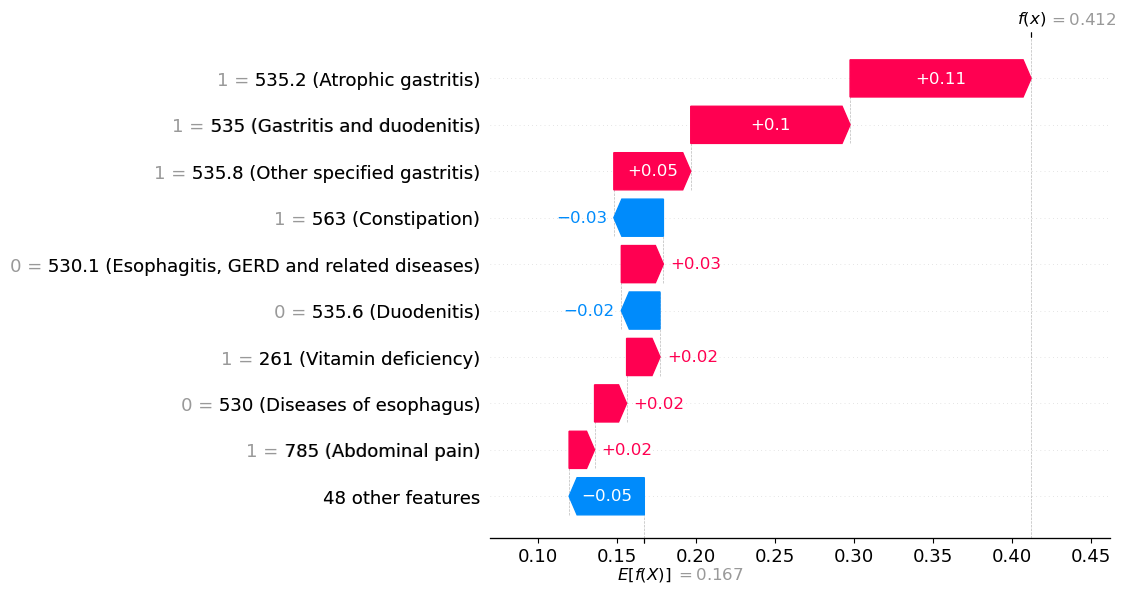

In [7]:
interpret_model(rf_model, data, 'R200130574', phecode_map, show=True)

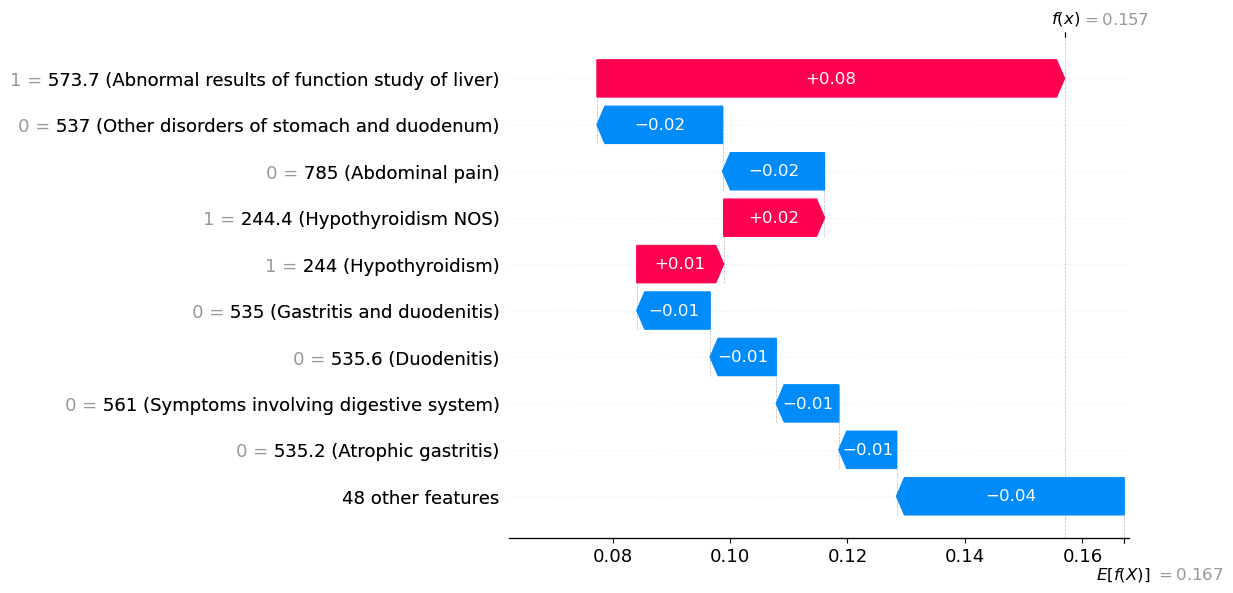

In [8]:
interpret_model(rf_model, data, 'R200021729', phecode_map, show=True)

In [2]:
cases = pd.read_csv('/data100t1/home/biand/Projects/PheWES/data/celiac_case_GRIDs.txt')
cases.head()

,grid
0,R200961637
1,R202239786
2,R202830629
3,R219371703
4,R220989408


In [3]:
sd_phecode = pd.read_csv('/data100t1/share/synthetic-deriv/phecodes/all-sd-phecodes-mar-2025/sd_samples_phecode.binary.txt.gz', compression='gzip', sep='\t')
sd_phecode.head()

: 

In [3]:
cases = pl.read_csv('/data100t1/home/biand/Projects/PheWES/data/celiac_case_GRIDs.txt')
cases.head()

grid
str
"""R200961637"""
"""R202239786"""
"""R202830629"""
"""R219371703"""
"""R220989408"""


In [6]:
sd_phecode = pl.read_csv('/data100t1/share/synthetic-deriv/phecodes/all-sd-phecodes-mar-2025/sd_samples_phecode.binary.txt.gz', separator='\t')
sd_phecode.head()

grid,008,008.5,008.51,008.52,008.6,008.7,010,031,031.1,038,038.1,038.2,038.3,041,041.1,041.11,041.12,041.2,041.21,041.4,041.8,041.9,053,053.1,054,060,070,070.1,070.2,070.3,070.4,070.9,071,071.1,078,079,…,963,963.1,964,964.1,965,965.1,965.2,965.3,966,967,969,971,972,972.1,972.2,972.6,973,974,975,976,977,979,980,981,983,984,985,986,987,988,989,990,994,994.1,994.2,994.21,996
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""R200000048""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R200000069""",0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R200000084""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R200000141""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R200000176""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
celiac_phecode = sd_phecode.filter(pl.col('grid').is_in(cases['grid']))

/tmp/ipykernel_2977827/551017092.py:1: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  celiac_phecode = sd_phecode.filter(pl.col('grid').is_in(cases['grid']))


In [10]:
celiac_phecode

grid,008,008.5,008.51,008.52,008.6,008.7,010,031,031.1,038,038.1,038.2,038.3,041,041.1,041.11,041.12,041.2,041.21,041.4,041.8,041.9,053,053.1,054,060,070,070.1,070.2,070.3,070.4,070.9,071,071.1,078,079,…,963,963.1,964,964.1,965,965.1,965.2,965.3,966,967,969,971,972,972.1,972.2,972.6,973,974,975,976,977,979,980,981,983,984,985,986,987,988,989,990,994,994.1,994.2,994.21,996
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""R200130574""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R200961637""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
"""R200995944""",0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
"""R201005482""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R202239786""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""R296529424""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R297579156""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""R298014443""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
celiac_phecode['557']

557
i64
1
1
1
1
1
…
1
1
1
